<a href="https://colab.research.google.com/github/sslo12/Estadistica-I/blob/main/EyP1_P1_C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***`1. ¿Cuál es el medio de transporte que usan para al colegio los estudiantes que participan en Censo escolar en cada estado?`***

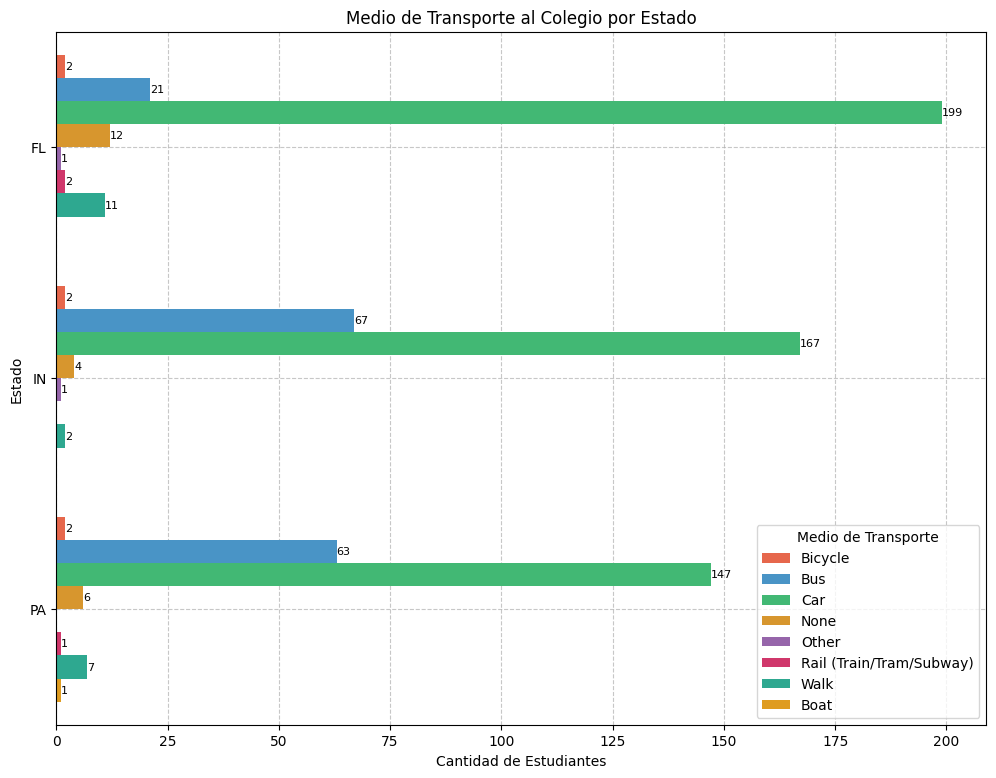

In [ ]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/DATA_COMBINADO.csv')
df_combinado = pd.DataFrame(data)


# Filtrar las columnas necesarias para el análisis
transport_columns = ['Country', 'Region', 'Travel_to_School']

# Agrupar por estado y medio de transporte y contar la frecuencia
transport_counts = df_combinado.groupby(['Country', 'Region', 'Travel_to_School']).size().reset_index(name='Count')

# Paleta de colores
colors = ['#FF5733', '#3498DB', '#2ECC71', '#F39C12', '#9B59B6', '#E91E63', '#1ABC9C', '#FFA500']

# Crear un gráfico de barras
plt.figure(figsize=(12, 9))

# Establecer la paleta de colores
sns.set_palette(colors)

# Crear el gráfico de barras
ax = sns.barplot(x='Count', y='Region', hue='Travel_to_School', data=transport_counts)

# Agregar el número de transporte en todas las barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    # Verificar que width no sea NaN antes de convertirlo a entero
    if not np.isnan(width) and height > 0.0:
        ax.annotate(f'{int(width)}', (x + width, y + height/2), va='center', ha='left', fontsize=8, color='black')

# Agregar cuadrícula a la gráfica detrás de las barras
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', alpha=0.7)

plt.title('Medio de Transporte al Colegio por Estado')
plt.xlabel('Cantidad de Estudiantes')
plt.ylabel('Estado')
plt.legend(title='Medio de Transporte')
plt.show()

### ***`2. ¿Cuál es el deporte / actividad favorita de los estudiantes que participan en Censo escolar en cada estado?`***

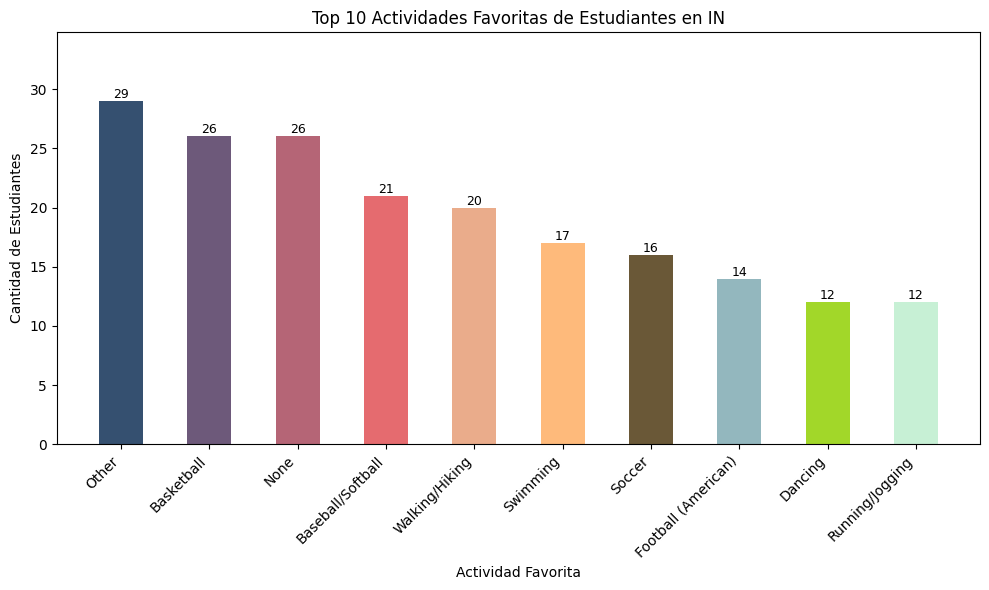

In [ ]:
# Filtrar los estados que quieres mostrar en la gráfica
selected_states = ["PA", "FL", "IN"]

# Crear una gráfica separada para cada estado
for state in selected_states:
    df_state = df_combinado[df_combinado["Region"] == 'IN'][["Country", "Region", "Favourite_physical_activity"]]

# Contar la frecuencia de cada actividad favorita en el estado
activity_state_counts = df_state["Favourite_physical_activity"].value_counts()

# Seleccionar las 10 actividades más comunes para mostrar en el gráfico
top_activities = activity_state_counts.head(10).index
activity_state_counts = activity_state_counts[top_activities]

# Paleta de colores
colors = ['#355070', '#6D597A', '#B56576', '#E56B6F', '#EAAC8B', '#FEBA7B', '#6A5837', '#93B7BE', '#A2D729', '#C7F0D5']

# Crear el gráfico de barras para el estado actual
plt.figure(figsize=(10, 6))

# Ajustar el ancho y el espaciado entre las barras
bar_width = 0.5
bars = plt.bar(activity_state_counts.index, activity_state_counts.values, color=colors, width=bar_width, align='center')

# Agregar números en las barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom', fontsize=9)

# Personalizar título con el nombre del estado
plt.title(f"Top 10 Actividades Favoritas de Estudiantes en IN")
plt.xlabel("Actividad Favorita")
plt.ylabel("Cantidad de Estudiantes")
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mayor legibilidad
plt.tight_layout()

# Limitar rango del eje y para enfocarse en los valores principales
plt.ylim(0, activity_state_counts.max() * 1.2)

# Mostrar el gráfico para el estado actual
plt.show()


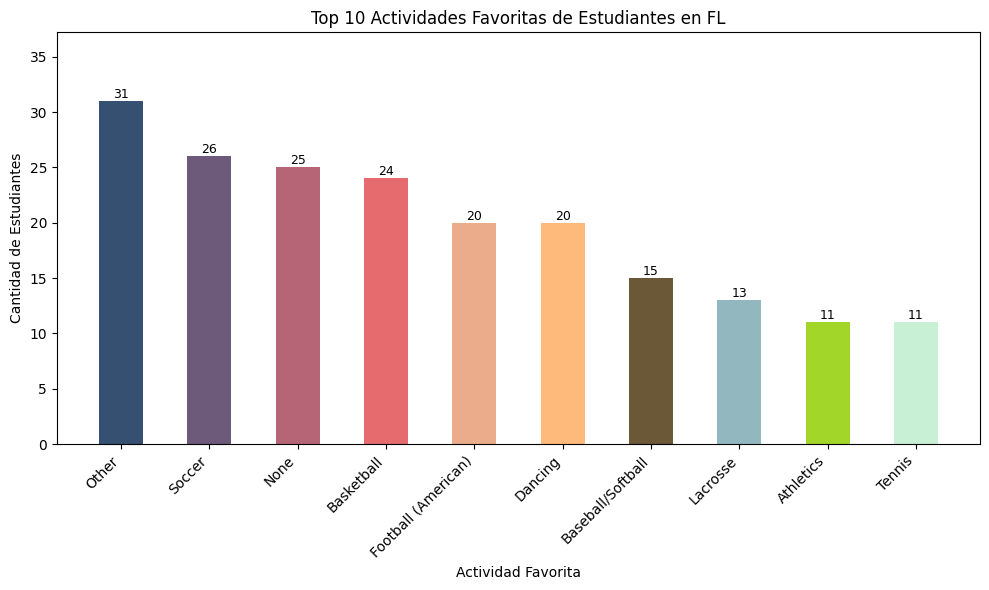

In [ ]:
# Filtrar los estados que quieres mostrar en la gráfica
selected_states = ["PA", "FL", "IN"]

# Crear una gráfica separada para cada estado
for state in selected_states:
    df_state = df_combinado[df_combinado["Region"] == 'FL'][["Country", "Region", "Favourite_physical_activity"]]

# Contar la frecuencia de cada actividad favorita en el estado
activity_state_counts = df_state["Favourite_physical_activity"].value_counts()

# Seleccionar las 10 actividades más comunes para mostrar en el gráfico
top_activities = activity_state_counts.head(10).index
activity_state_counts = activity_state_counts[top_activities]

# Paleta de colores
colors = ['#355070', '#6D597A', '#B56576', '#E56B6F', '#EAAC8B', '#FEBA7B', '#6A5837', '#93B7BE', '#A2D729', '#C7F0D5']

# Crear el gráfico de barras para el estado actual
plt.figure(figsize=(10, 6))

# Ajustar el ancho y el espaciado entre las barras
bar_width = 0.5
bars = plt.bar(activity_state_counts.index, activity_state_counts.values, color=colors, width=bar_width, align='center')

# Agregar números en las barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom', fontsize=9)

# Personalizar título con el nombre del estado
plt.title(f"Top 10 Actividades Favoritas de Estudiantes en FL")
plt.xlabel("Actividad Favorita")
plt.ylabel("Cantidad de Estudiantes")
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mayor legibilidad
plt.tight_layout()

# Limitar rango del eje y para enfocarse en los valores principales
plt.ylim(0, activity_state_counts.max() * 1.2)

# Mostrar el gráfico para el estado actual
plt.show()

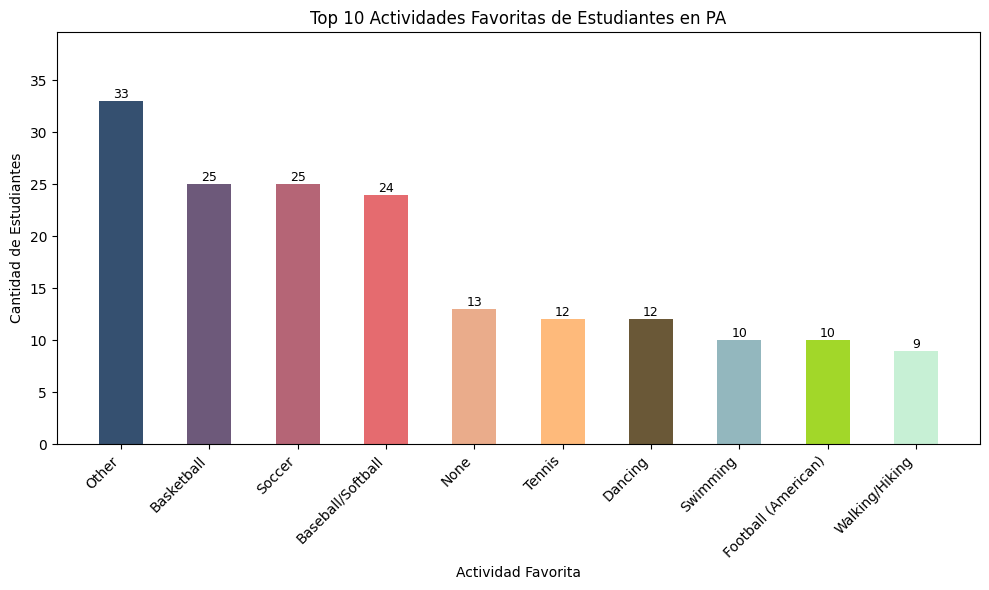

In [ ]:
# Filtrar los estados que quieres mostrar en la gráfica
selected_states = ["PA", "FL", "IN"]

# Crear una gráfica separada para cada estado
for state in selected_states:
    df_state = df_combinado[df_combinado["Region"] == 'PA'][["Country", "Region", "Favourite_physical_activity"]]

# Contar la frecuencia de cada actividad favorita en el estado
activity_state_counts = df_state["Favourite_physical_activity"].value_counts()

# Seleccionar las 10 actividades más comunes para mostrar en el gráfico
top_activities = activity_state_counts.head(10).index
activity_state_counts = activity_state_counts[top_activities]

# Paleta de colores
colors = ['#355070', '#6D597A', '#B56576', '#E56B6F', '#EAAC8B', '#FEBA7B', '#6A5837', '#93B7BE', '#A2D729', '#C7F0D5']

# Crear el gráfico de barras para el estado actual
plt.figure(figsize=(10, 6))

# Ajustar el ancho y el espaciado entre las barras
bar_width = 0.5
bars = plt.bar(activity_state_counts.index, activity_state_counts.values, color=colors, width=bar_width, align='center')

# Agregar números en las barras
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(int(bar.get_height())), ha='center', va='bottom', fontsize=9)

# Personalizar título con el nombre del estado
plt.title(f"Top 10 Actividades Favoritas de Estudiantes en PA")
plt.xlabel("Actividad Favorita")
plt.ylabel("Cantidad de Estudiantes")
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mayor legibilidad
plt.tight_layout()

# Limitar rango del eje y para enfocarse en los valores principales
plt.ylim(0, activity_state_counts.max() * 1.2)

# Mostrar el gráfico para el estado actual
plt.show()

### *`3. ¿Cuál es el tipo comida favorita de los estudiantes que participan en Censo escolar en cada estado?`*

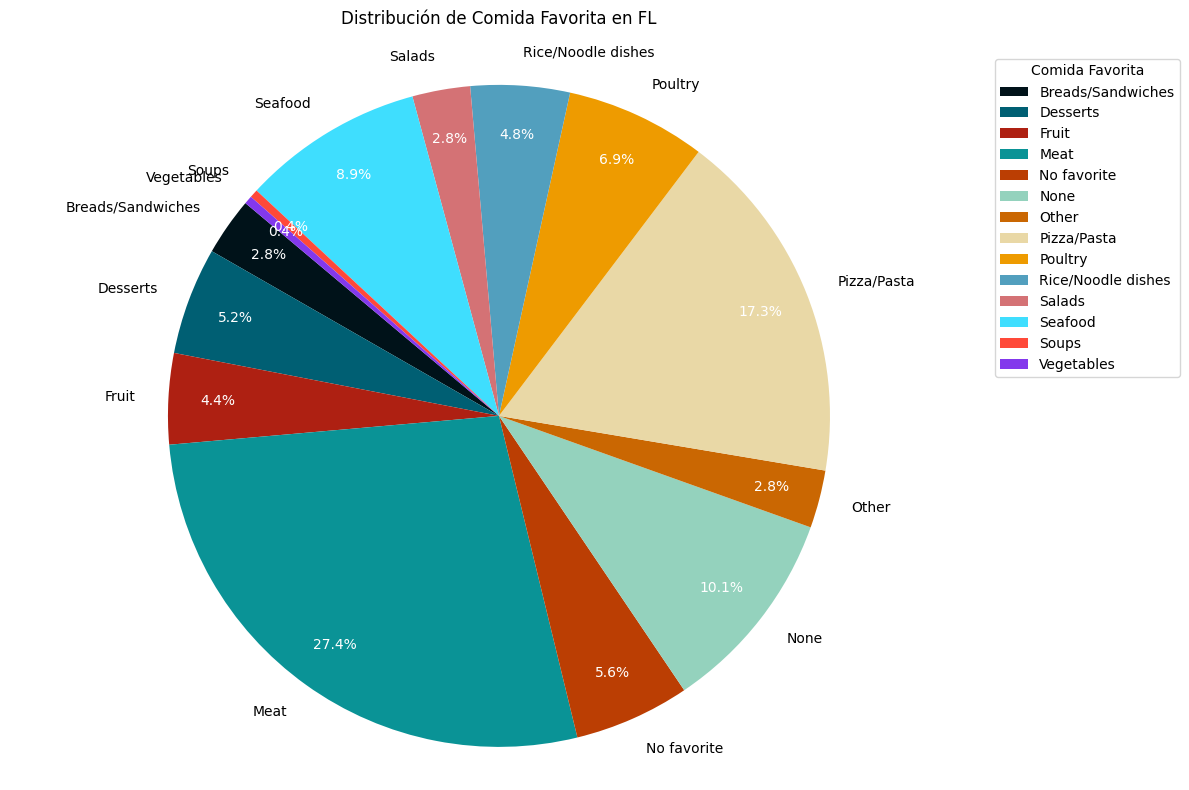

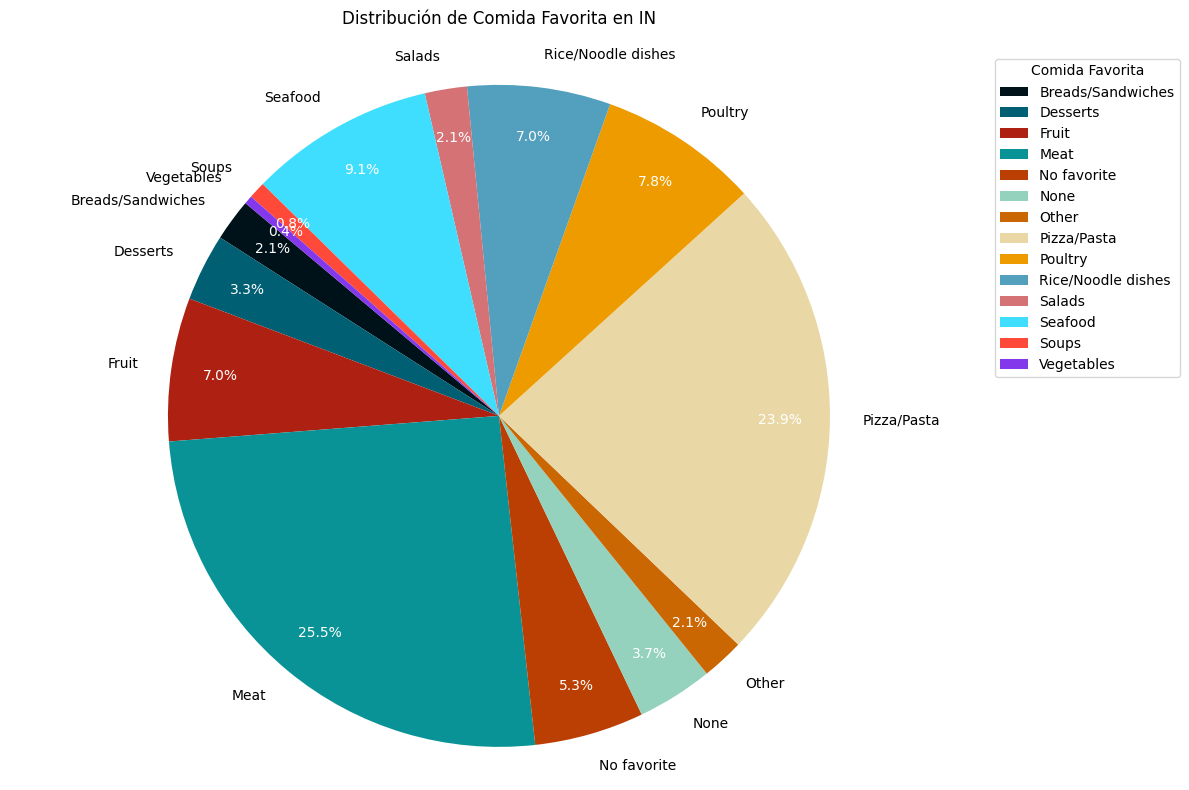

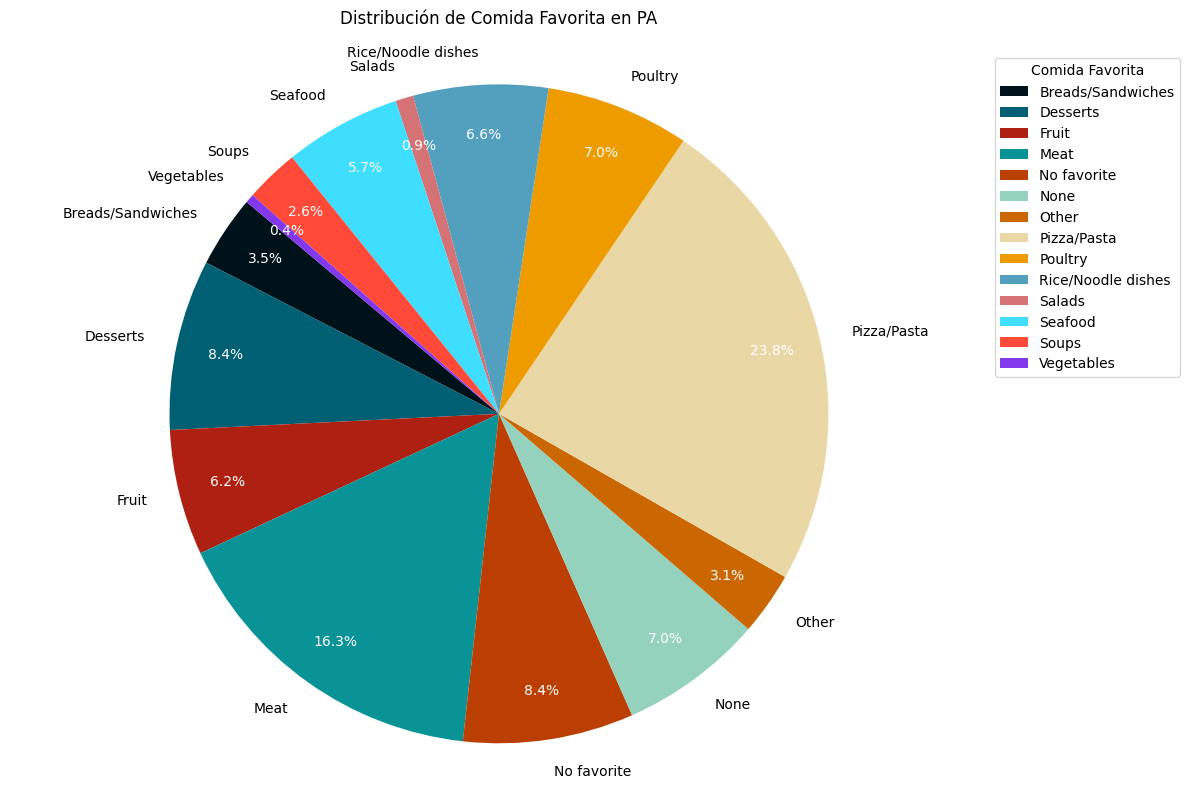

In [ ]:
# Filtrar las columnas necesarias para el análisis
food_columns = ['Country', 'Region', 'Favorite_Food']

# Obtener la distribución de tipos de comida favorita por estado
fav_food_distribution = df_combinado.groupby(['Country', 'Region', 'Favorite_Food']).size().reset_index(name='Count')

# Crear un diccionario para almacenar los datos de cada estado
state_data = {}
for state in fav_food_distribution['Region'].unique():
    state_data[state] = fav_food_distribution[fav_food_distribution['Region'] == state][['Favorite_Food', 'Count']].set_index('Favorite_Food')['Count'].to_dict()

# Colores personalizados
colors = ['#001219', '#005F73', '#AE2012', '#0A9396', '#BB3E03', '#94D2BD', '#CA6702', '#E9D8A6', '#EE9B00', '#529FBE', '#D47275', '#3FDEFE', '#FF4939', '#8338EC']

# Crear el gráfico de círculos
for state, data in state_data.items():
    plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura
    wedges, texts, autotexts = plt.pie(
        data.values(),
        labels=data.keys(),
        autopct='%1.1f%%',
        startangle=140,
        pctdistance=0.85,
        labeldistance=1.1,
        colors=colors)
    plt.setp(autotexts, size=10, color='white')
    plt.title(f'Distribución de Comida Favorita en {state}', pad=20)
    plt.axis('equal')
    plt.legend(title='Comida Favorita', loc='upper left', bbox_to_anchor=(1.0, 1.0))  # Ajustar la posición de la leyenda
    plt.tight_layout()
    plt.show()


### *`4. ¿Cuál es el nivel más alto de educación que planean alcanzar los estudiantes que participan en Censo escolar en cada estado?`*

<ipython-input-6-ffeec13f3fa2>:32: RuntimeWarning: divide by zero encountered in long_scalars
  if value / total > 0.03:


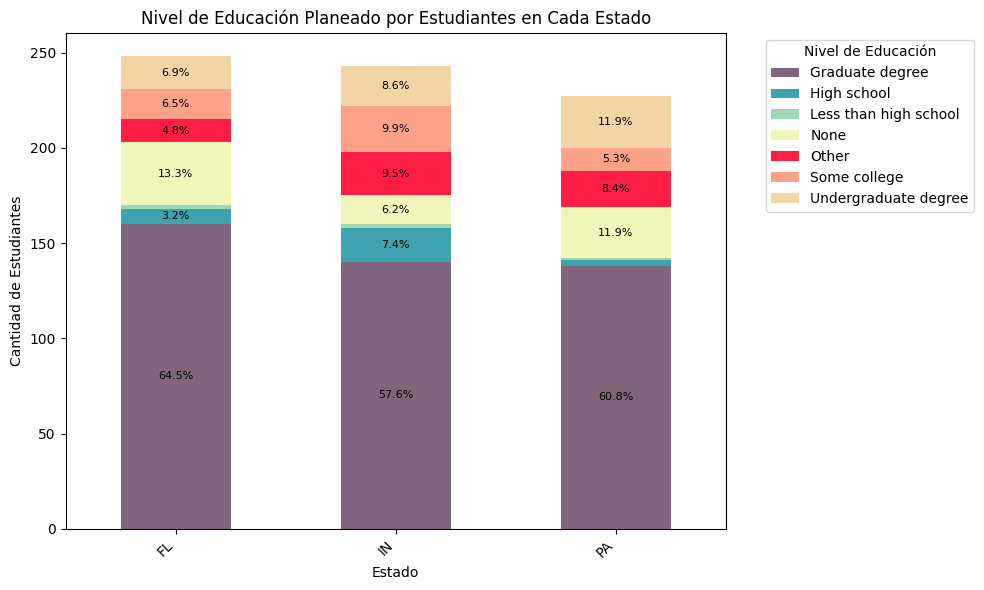

In [ ]:
import matplotlib.pyplot as plt

# Seleccionar las columnas relevantes
education_data = df_combinado[["Region", "Planned_Education_Level"]]

# Contar la frecuencia de los niveles de educación en cada estado
education_state_counts = education_data.groupby(["Region", "Planned_Education_Level"]).size().unstack(fill_value=0)

# Calcular los porcentajes en relación a cada fila
education_state_percentages = education_state_counts.div(education_state_counts.sum(axis=1), axis=0) * 100

# Ordenar los niveles educativos por orden ascendente
education_state_counts = education_state_counts.reindex(sorted(education_state_counts.columns), axis=1)
education_state_percentages = education_state_percentages.reindex(sorted(education_state_percentages.columns), axis=1)

# Colores personalizados
colors = ['#81657e', '#3ea3af', '#9fd9b3', '#f0f6b9', '#ff1d44', '#fea189', '#f3d5a5']

# Crear el gráfico de barras agrupadas
ax = education_state_counts.plot(kind="bar", stacked=True, figsize=(10, 6), color=colors)
plt.title("Nivel de Educación Planeado por Estudiantes en Cada Estado")
plt.xlabel("Estado")
plt.ylabel("Cantidad de Estudiantes")
plt.xticks(rotation=45, ha="right")  # Rotar las etiquetas y ajustar la alineación

# Añadir etiquetas de porcentaje solo en secciones grandes de las barras
for i in range(len(education_state_counts)):
    total = 0
    for category in education_state_counts.columns:
        value = education_state_counts.loc[:, category].iloc[i]
        percentage = education_state_percentages.loc[:, category].iloc[i]
        if value / total > 0.03:
            plt.text(i, total + value / 2, f"{percentage:.1f}%", ha="center", va="center", fontsize=8, color="black")
        total += value

# Ajustar las leyendas y ubicación
legend_labels = education_state_counts.columns.tolist()
plt.legend(legend_labels, title="Nivel de Educación", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

# Mostrar el gráfico
plt.show()


### *`5. ¿Cuántas personas viven habitualmente en la casa de los estudiantes que participan en Censo escolar en cada estado?`*

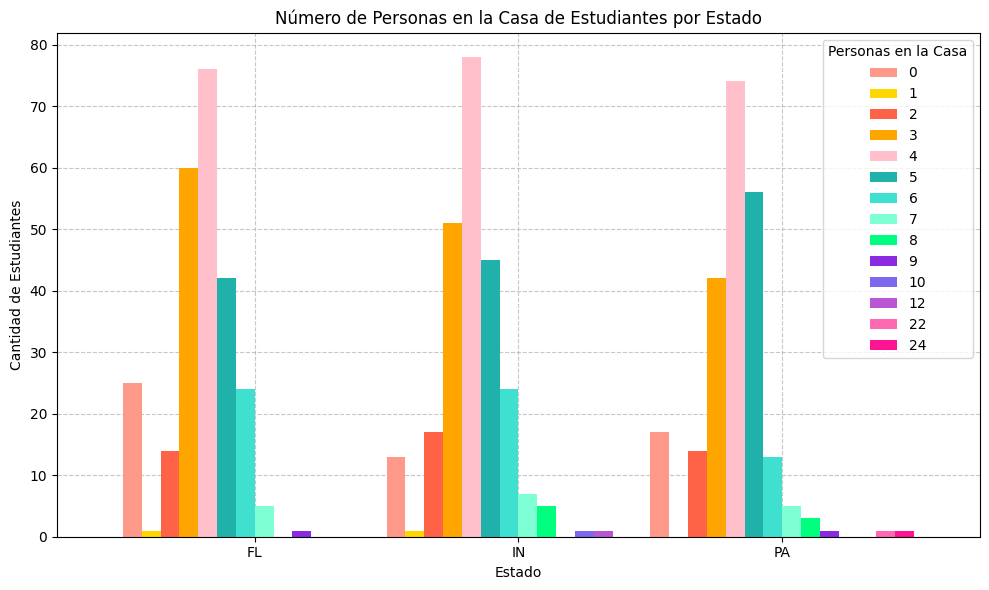

In [ ]:
# Seleccionar las columnas relevantes
df_home_state = df_combinado[["Region", "Home_Occupants"]]

# Paleta de colores
colors = ["#FF9A8B", "#FFD700", "#FF6347", "#FFA500", "#FFC0CB", "#20B2AA", "#40E0D0", "#7FFFD4",
          "#00FF7F", "#8A2BE2", "#7B68EE", "#BA55D3", "#FF69B4", "#FF1493", "#FF4500"]

# Contar la frecuencia del número de personas que viven en la casa en cada estado
home_state_counts = df_home_state.groupby(["Region", "Home_Occupants"]).size().unstack(fill_value=0)

# Crear el gráfico de barras separadas con barras más anchas
ax = home_state_counts.plot(kind="bar", figsize=(10, 6), color=colors, width=1.0)  # Ajusta el valor de width

plt.title("Número de Personas en la Casa de Estudiantes por Estado")
plt.xlabel("Estado")
plt.ylabel("Cantidad de Estudiantes")
plt.legend(title="Personas en la Casa")
plt.xticks(rotation=0)
plt.tight_layout()

# Agregar cuadrícula a la gráfica detrás de las barras
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


En los tres estados la cantidad de personas que viven habitualmente en la casa de los estudiantes es de 4 personas.

### ***`6. Construya un histograma con la variable “tiempo que trabaja con pago el estudiante en la semana (medido en horas)`***

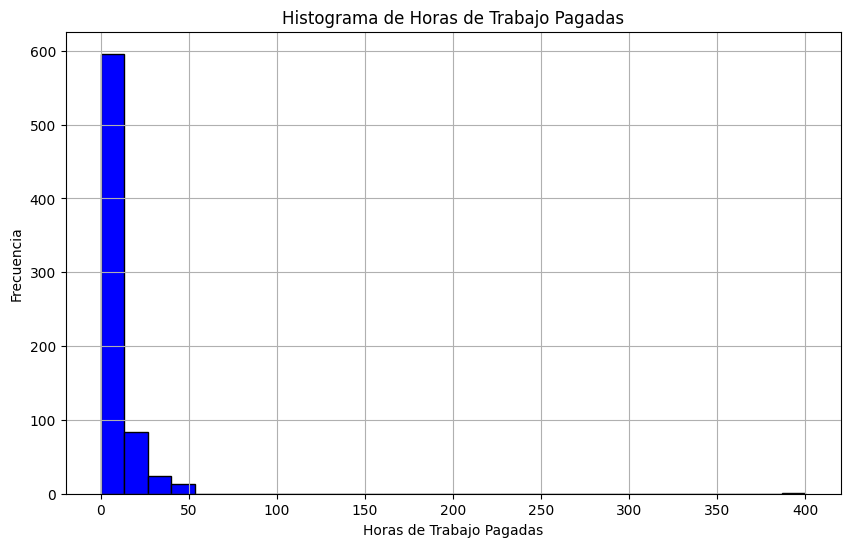

El porcentaje de personas que trabajan al menos 15 horas a la semana con pago es de: 3.20%
El porcentaje de personas que trabajan al menos 5 horas a la semana con pago es de: 3.76%
El 15% de los estudiantes trabajan al menos 15.0 horas con pago.
El 15% de los estudiantes trabajan como máximo 0.0 horas con pago.
El 50% de los estudiantes trabajan como máximo 0.0 horas con pago.
En promedio, los estudiantes trabajan 5.91 horas con pago a la semana.
La desviación estándar de las horas de trabajo pagadas a la semana es: 17.53


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Obtener los valores de la columna Paid_Work_Hours
paid_work_hours = df_combinado["Paid_Work_Hours"]

# Crear el histograma
plt.figure(figsize=(10, 6))  # Tamaño opcional de la figura
plt.hist(paid_work_hours, bins=30, color='blue', edgecolor='black')  # Puedes ajustar el número de bins
plt.xlabel("Horas de Trabajo Pagadas")
plt.ylabel("Frecuencia")
plt.title("Histograma de Horas de Trabajo Pagadas")
plt.grid(True)

plt.show()

# Obtener los valores de la columna Paid_Work_Hours
paid_work_hours = df_combinado["Paid_Work_Hours"]

# Calcular el porcentaje de estudiantes que trabajan máximo 15 horas a la semana con pago
max_hours_threshold = 15
students_max_15_hours = paid_work_hours[paid_work_hours == max_hours_threshold]
percentage_max_15_hours = (len(students_max_15_hours) / len(paid_work_hours)) * 100

print(f"El porcentaje de personas que trabajan al menos {max_hours_threshold} horas a la semana con pago es de: {percentage_max_15_hours:.2f}%")

# Calcular el porcentaje de personas que trabajan al menos 5 horas a la semana con pago
min_hours_threshold = 5
people_min_5_hours = paid_work_hours[paid_work_hours == min_hours_threshold]
percentage_min_5_hours = (len(people_min_5_hours) / len(paid_work_hours)) * 100

# Imprimir el porcentaje en la consola
print(f"El porcentaje de personas que trabajan al menos {min_hours_threshold} horas a la semana con pago es de: {percentage_min_5_hours:.2f}%")

# Obtener el valor que corresponde al 15% superior
threshold = df_combinado["Paid_Work_Hours"].quantile(0.85)

print(f"El 15% de los estudiantes trabajan al menos {threshold} horas con pago.")

# Obtener el valor que corresponde al 15% inferior
threshold = df_combinado["Paid_Work_Hours"].quantile(0.15)

print(f"El 15% de los estudiantes trabajan como máximo {threshold} horas con pago.")

# Obtener el valor que corresponde al 50% de la distribución (mediana)
median_hours = df_combinado["Paid_Work_Hours"].median()

print(f"El 50% de los estudiantes trabajan como máximo {median_hours} horas con pago.")

# Calcular el promedio de horas de trabajo pagadas a la semana
average_hours = df_combinado["Paid_Work_Hours"].mean()

print(f"En promedio, los estudiantes trabajan {average_hours:.2f} horas con pago a la semana.")

# Calcular la desviación estándar de las horas de trabajo pagadas a la semana
std_deviation = df_combinado["Paid_Work_Hours"].std()

print(f"La desviación estándar de las horas de trabajo pagadas a la semana es: {std_deviation:.2f}")

### ***`7. Construya una Ojiva para la variable “Tiempo que dedican los estudiantes para ayudar a los quehaceres del Hogar'`***

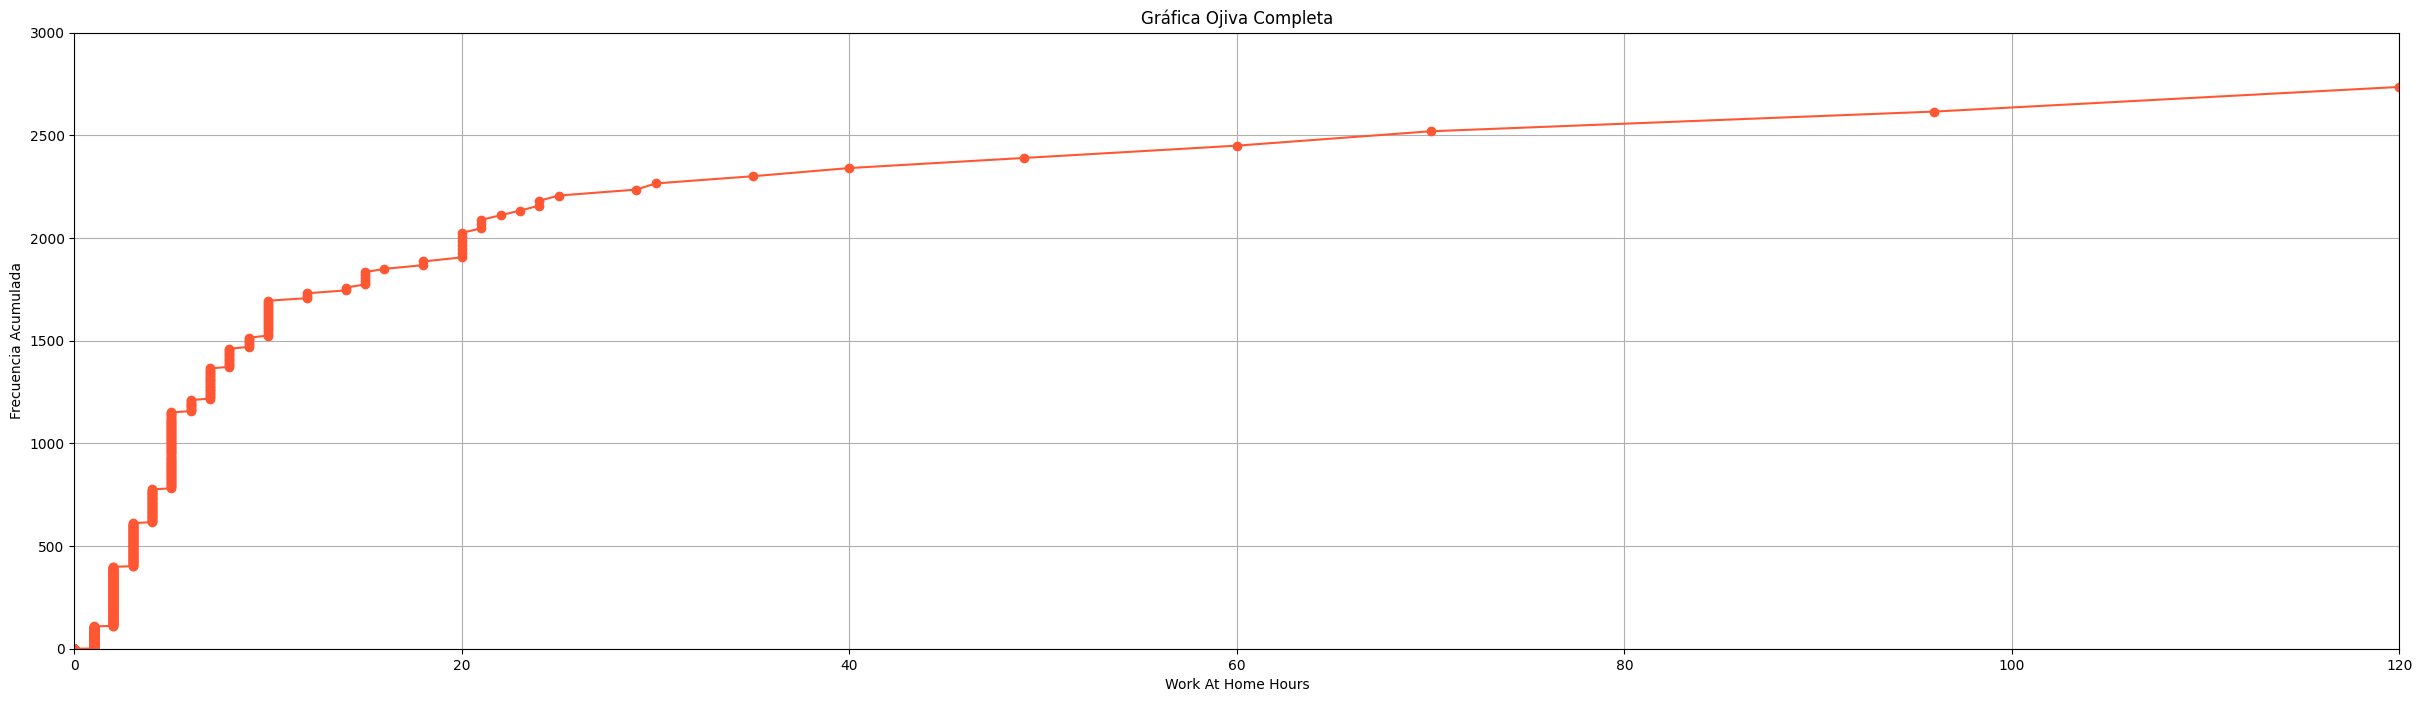

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
data = pd.read_csv('/content/DATA_COMBINADO.csv')
df = pd.DataFrame(data)

# Ordena los valores de la columna 'Work_At_Home_Hours'
sorted_hours = df['Work_At_Home_Hours'].sort_values()

# Calcula la frecuencia acumulada
cumulative_frequency = sorted_hours.cumsum()

# Calcula la frecuencia relativa acumulada
#cumulative_relative_frequency = cumulative_frequency / cumulative_frequency.max()

# Crea la gráfica ojiva
plt.figure(figsize=(30, 8))  #Ajustar los valores (ancho, alto)

# Ajusta los límites del eje x para ampliar el intervalo de 0 a 50
plt.ylim(0, 3000)  # Ampliar el intervalo de visualización
plt.xlim(0, 120)  # Ampliar el intervalo de visualización
plt.plot(sorted_hours, cumulative_frequency, marker='o')
plt.title('Gráfica Ojiva Completa')
plt.xlabel('Work At Home Hours')
plt.ylabel('Frecuencia Acumulada')
plt.grid(True)
plt.show()


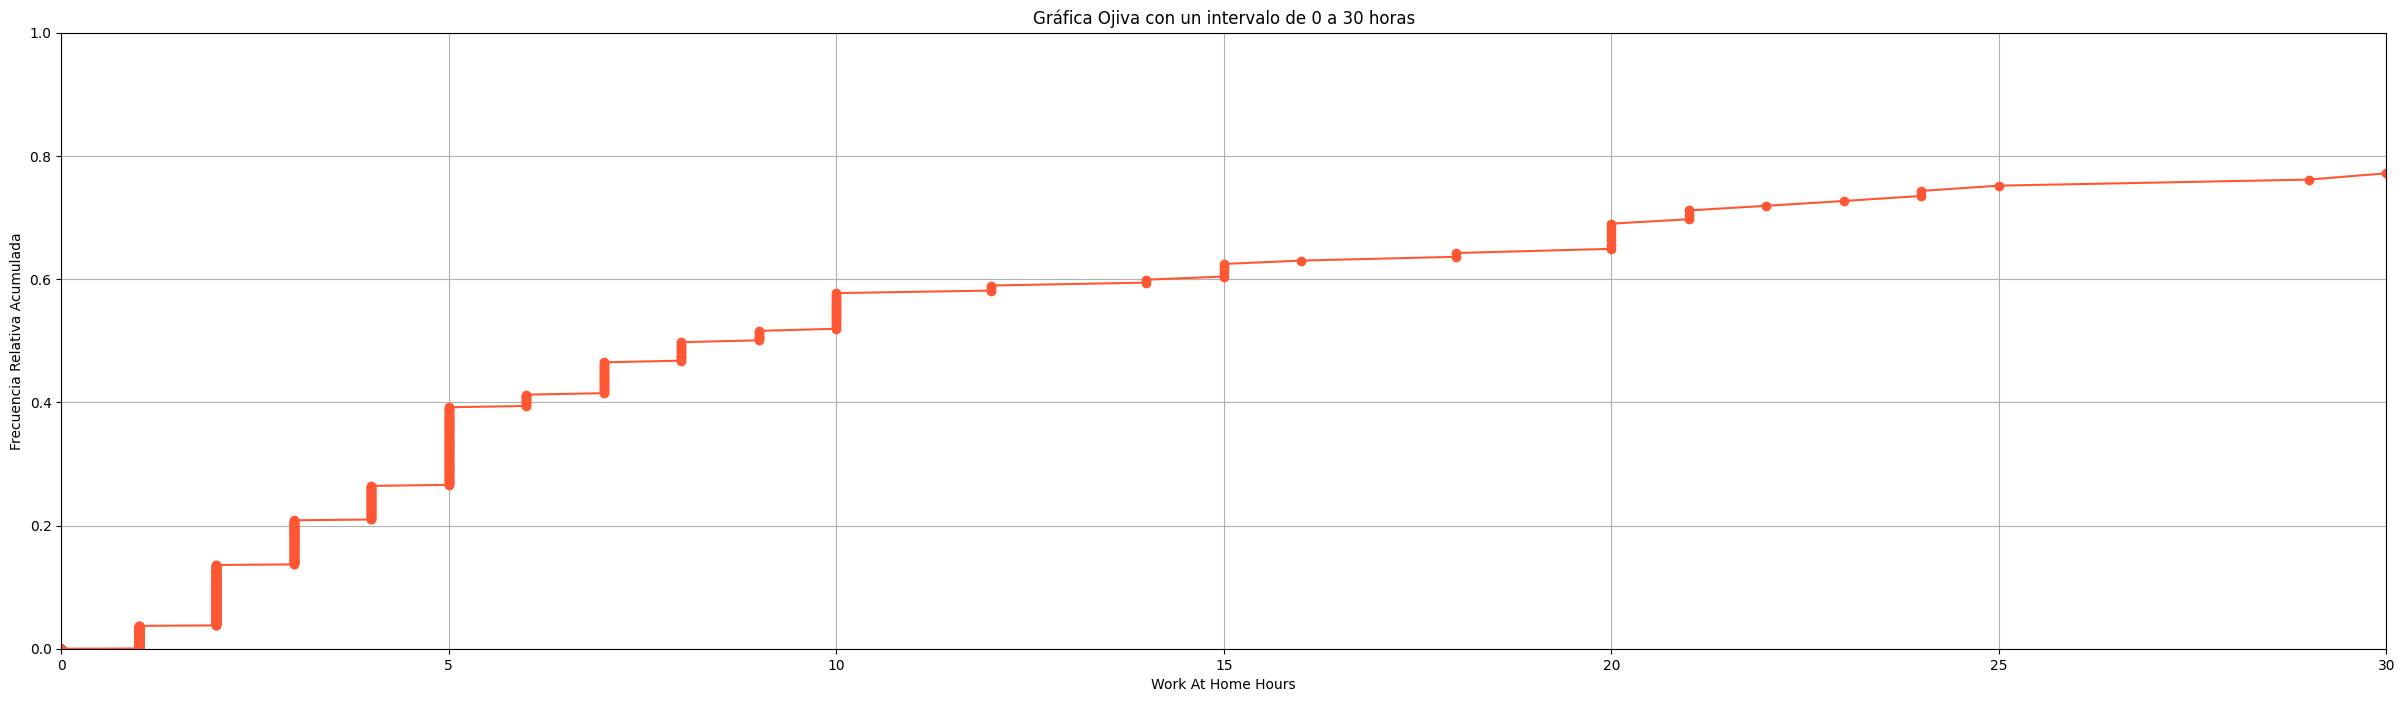

In [ ]:
# Calcula la frecuencia relativa acumulada
cumulative_relative_frequency = cumulative_frequency / cumulative_frequency.max()

# Crea la gráfica ojiva
plt.figure(figsize=(30, 8))  #Ajustar los valores (ancho, alto)

# Ajusta los límites del eje x para ampliar el intervalo de 0 a 50
plt.ylim(0, 1.0)  # Ampliar el intervalo de visualización
plt.xlim(0, 30)  # Ampliar el intervalo de visualización
plt.plot(sorted_hours, cumulative_relative_frequency, marker='o')
plt.title('Gráfica Ojiva con un intervalo de 0 a 30 horas')
plt.xlabel('Work At Home Hours')
plt.ylabel('Frecuencia Relativa Acumulada')
plt.grid(True)
plt.show()

In [ ]:
# a) Porcentaje de estudiantes que dedican mínimo 15 horas
percentage_min_15 = cumulative_relative_frequency[sorted_hours >= 15].min()
print(f'a) Porcentaje de estudiantes que dedican mínimo 15 horas: {percentage_min_15*100:.2f}%')

# b) Porcentaje de estudiantes que dedican máximo 5 horas
percentage_max_5 = cumulative_relative_frequency[sorted_hours <= 5].max()
print(f"b) Porcentaje de estudiantes que dedican máximo 5 horas: {percentage_max_5 * 100:.2f}%")

# c) 15% de los estudiantes ayudan en sus casas máximo cuantas horas
students_15_percent = cumulative_relative_frequency >= 0.15
hours_at_max_15_percent = sorted_hours[students_15_percent].iloc[0]
print(f"c) 15% de los estudiantes ayudan en sus casas máximo {hours_at_max_15_percent:.2f} horas")

# d) 35% de los estudiantes ayudan en sus casas mínimo cuantas horas
students_35_percent = cumulative_relative_frequency >= 0.35
hours_at_min_35_percent = sorted_hours[students_35_percent].iloc[0]
print(f"d) 35% de los estudiantes ayudan en sus casas mínimo {hours_at_min_35_percent:.2f} horas")

# e) Intervalo donde se halla la moda (punto más alto)
index_of_mode = cumulative_relative_frequency.idxmax()
mode_interval = sorted_hours.iloc[index_of_mode]
print(f"e) Intervalo donde se halla la moda: {mode_interval:.2f} horas")

# f) 50% de los estudiantes ayudan en sus casas máximo cuantas horas
students_50_percent = cumulative_relative_frequency >= 0.50
hours_at_max_50_percent = sorted_hours[students_50_percent].iloc[0]
print(f"f) 50% de los estudiantes ayudan en sus casas máximo {hours_at_max_50_percent:.2f} horas")

# g) Promedio y desviación estándar
mean_hours = sorted_hours.mean()
std_deviation_hours = sorted_hours.std()
print(f"g) Promedio de horas: {mean_hours:.2f} horas")
print(f"   Desviación estándar de horas: {std_deviation_hours:.2f} horas")

# h) Tipo de asimetría (usando la asimetría de Fisher)
fisher = sorted_hours.skew()
if fisher > 0:
    fisher_type = "asimetría positiva (cola derecha)"
elif fisher < 0:
    fisher_type = "asimetría negativa (cola izquierda)"
else:
    fisher_type = "simetría"
print(f"h) Tipo de asimetría: {fisher_type}")

a) Porcentaje de estudiantes que dedican mínimo 15 horas: 60.45%
b) Porcentaje de estudiantes que dedican máximo 5 horas: 39.24%
c) 15% de los estudiantes ayudan en sus casas máximo 3.00 horas
d) 35% de los estudiantes ayudan en sus casas mínimo 5.00 horas
e) Intervalo donde se halla la moda: 23.00 horas
f) 50% de los estudiantes ayudan en sus casas máximo 9.00 horas
g) Promedio de horas: 4.07 horas
   Desviación estándar de horas: 10.87 horas
h) Tipo de asimetría: asimetría positiva (cola derecha)




### ***`8. Construya una gráfica de Diagrama de cajas para la comparar la opinión en los diferentes Estados de hombres y mujeres (Gender) con respecto a la importancia de reducir la contaminación (pollution)'`***

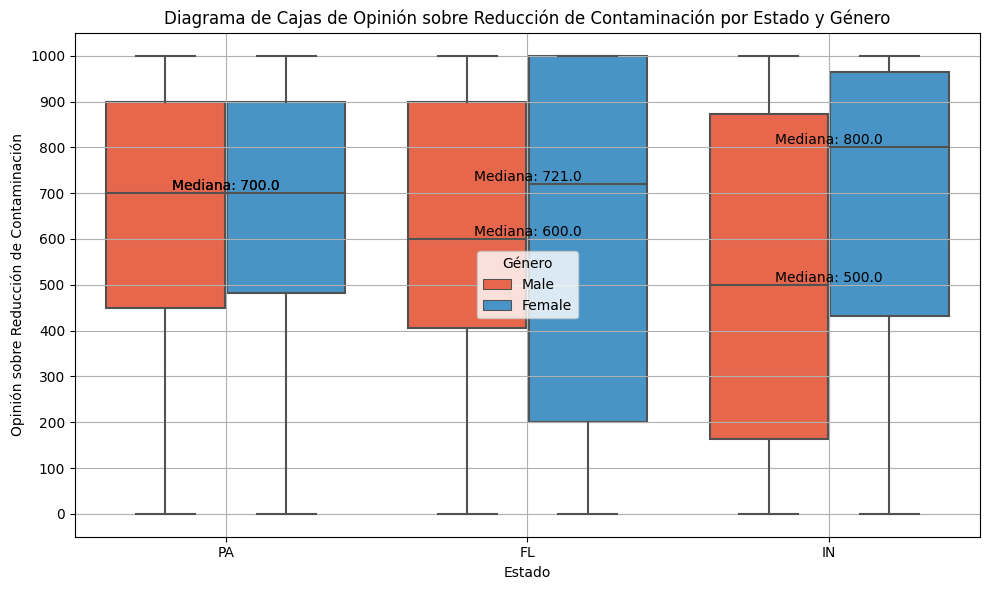

In [ ]:

import seaborn as sns

# Filtrar columnas relevantes
data = df_combinado[["Region", "Gender", "Importance_reducing_pollution"]]

# Calcular la proporción de mujeres y hombres en cada estado
gender_proportions = data.groupby(["Region", "Gender"]).size().unstack().fillna(0)
gender_proportions["Total"] = gender_proportions.sum(axis=1)
gender_proportions["Female_Proportion"] = gender_proportions["Female"] / gender_proportions["Total"]
gender_proportions["Male_Proportion"] = gender_proportions["Male"] / gender_proportions["Total"]

# Calcular el ancho proporcional de las cajas
box_widths = [
    gender_proportions.loc[region, f"{gender}_Proportion"] if gender in gender_proportions.columns else 0
    for region, gender in data[["Region", "Gender"]].itertuples(index=False)
]

# Crear un diagrama de cajas utilizando seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x="Region", y="Importance_reducing_pollution", hue="Gender", data=data)
plt.xlabel("Estado")
plt.ylabel("Opinión sobre Reducción de Contaminación")
plt.title("Diagrama de Cajas de Opinión sobre Reducción de Contaminación por Estado y Género")
plt.grid(True)
plt.legend(title="Género")

# Ajustar los valores en el eje Y
plt.yticks(range(0, 1100, 100))

# Agregar las líneas para mostrar el valor de la mediana en cada caja
medians = data.groupby(["Region", "Gender"])["Importance_reducing_pollution"].median().reset_index()
for i, label in enumerate(plt.gca().get_xticklabels()):
    region = label.get_text()
    for gender in ["Male", "Female"]:
        if gender in gender_proportions.columns:
            median_value = medians[(medians["Region"] == region) & (medians["Gender"] == gender)]["Importance_reducing_pollution"].values[0]
            plt.text(i, median_value, f"Mediana: {median_value}", color="black", ha="center", va="bottom")

plt.tight_layout()
plt.show()


### ***`9. Construya una tabla cruzada de indicadores entre la variable “¿Cuantas horas de sueño por noche suele dormir cuando no tiene clases al día siguiente?” versus “Genero”. A partir de esta tabla responda las siguientes preguntas:`***

In [ ]:
from tabulate import tabulate

# Filtrar el DataFrame para excluir filas con Gender igual a "None"
df_filtered = df_combinado[df_combinado["Gender"] != "None"]

# Crear una tabla cruzada entre las variables de interés en el DataFrame filtrado
tabla_cruzada = pd.crosstab(index=df_filtered["Sleep_Hours_Non_Schoolnight"], columns=df_filtered["Gender"])

# Imprimir la tabla cruzada
print(tabulate(tabla_cruzada, headers='keys', tablefmt='grid'))

+-------------------------------+----------+--------+
|   Sleep_Hours_Non_Schoolnight |   Female |   Male |
+===============================+==========+========+
|                             0 |       41 |     26 |
+-------------------------------+----------+--------+
|                             2 |        1 |      3 |
+-------------------------------+----------+--------+
|                             3 |        4 |      1 |
+-------------------------------+----------+--------+
|                             4 |        6 |     13 |
+-------------------------------+----------+--------+
|                             5 |       12 |     12 |
+-------------------------------+----------+--------+
|                             6 |       10 |     19 |
+-------------------------------+----------+--------+
|                             7 |       19 |     18 |
+-------------------------------+----------+--------+
|                             8 |       68 |     70 |
+---------------------------

a) ¿Qué porcentaje de estudiantes de la muestra son mujeres?

In [ ]:
# Contar el número de estudiantes mujeres
num_estudiantes_mujeres = df_filtered[df_filtered["Gender"] == "Female"].shape[0]

# Contar el número total de estudiantes en la muestra
num_estudiantes_total = df_filtered.shape[0]

# Calcular el porcentaje
porcentaje_mujeres = (num_estudiantes_mujeres / num_estudiantes_total) * 100

# Imprimir el resultado
print(f"El porcentaje de estudiantes que son mujeres es: {porcentaje_mujeres:.2f}%")

El porcentaje de estudiantes que son mujeres es: 49.16%


b) ¿Cuantas horas de sueño en promedio suelen dormir cuando no tiene clases al día siguiente los estudiantes de la muestra?

In [ ]:
# Calcular el promedio de todas las horas de sueño en la muestra
promedio_total_horas_sueno = df_filtered["Sleep_Hours_Non_Schoolnight"].mean()

# Imprimir el resultado
print(f"Promedio de horas de sueño de todos los estudiantes: {promedio_total_horas_sueno:.2f} horas")

Promedio de horas de sueño de todos los estudiantes: 7.93 horas


c) ¿En términos generales que genero duermen más tiempo?

In [ ]:
# Calcular las medias de tiempo de sueño para género Femenino y Masculino utilizando la tabla cruzada
mean_female = (tabla_cruzada.index * tabla_cruzada['Female']).sum() / tabla_cruzada['Female'].sum()
mean_male = (tabla_cruzada.index * tabla_cruzada['Male']).sum() / tabla_cruzada['Male'].sum()

# Mostrar los resultados de las medias
print(f"Media de tiempo de sueño para género Femenino: {mean_female:.2f} horas")
print(f"Media de tiempo de sueño para género Masculino: {mean_male:.2f} horas")


Media de tiempo de sueño para género Femenino: 7.77 horas
Media de tiempo de sueño para género Masculino: 8.08 horas


d) ¿En términos generales que genero los tiempos son más homogéneos?

In [ ]:
# Calcular la varianza total de todas las horas de sueño
varianza_total = df_filtered["Sleep_Hours_Non_Schoolnight"].var()

# Calcular la varianza por cada género
varianza_por_genero = tabla_cruzada.var()

# Encontrar el género con la menor varianza (mayor homogeneidad)
genero_mas_homogeneo = varianza_por_genero.idxmin()

# Imprimir los resultados
print(f"Varianza total de todas las horas de sueño: {varianza_total:.2f}")
print("Varianza por género:")
print(varianza_por_genero)
print(f"El género más homogéneo en tiempos de sueño es: {genero_mas_homogeneo}")


Varianza total de todas las horas de sueño: 9.99
Varianza por género:
Gender
Female    805.695238
Male      868.666667
dtype: float64
El género más homogéneo en tiempos de sueño es: Female


e) ¿En términos generales que genero los tiempos son más simétricos?

In [ ]:
from scipy.stats import skew

# Calcular la asimetría de las horas de sueño para cada género
asimetria_por_genero = tabla_cruzada.apply(lambda col: skew(col, nan_policy='omit'))

# Identificar qué género tiene tiempos de sueño más simétricos (asimetría cercana a cero)
genero_mas_simetrico = asimetria_por_genero.idxmin()

# Imprimir el resultado de asimetría para cada género
print("Asimetría de las horas de sueño por género:")
print(asimetria_por_genero)

# Imprimir el género más simétrico
print(f"\nEl género con tiempos de sueño más simétricos es: {genero_mas_simetrico}")


Asimetría de las horas de sueño por género:
Gender
Female    1.130611
Male      1.395537
dtype: float64

El género con tiempos de sueño más simétricos es: Female


f) ¿Cual genero tiene un histograma más puntiagudo? ¿Cuál género tiene un
histograma más aplanado o chato?


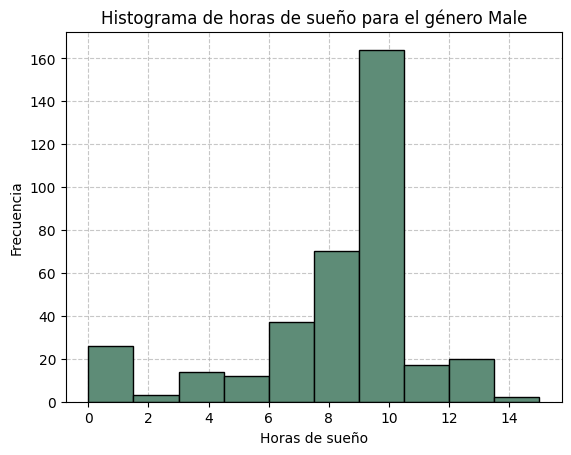

In [ ]:
# Seleccionar el género para crear el histograma
genero_male = "Male"

# Seleccionar los datos de horas de sueño correspondientes a ese género
datos_horas_sueno = df_filtered[df_filtered["Gender"] == genero_male]["Sleep_Hours_Non_Schoolnight"]

# Crear el histograma
plt.hist(datos_horas_sueno, bins=10, edgecolor='black', color='#5E8C77' )
plt.xlabel("Horas de sueño")
plt.ylabel("Frecuencia")
plt.title(f"Histograma de horas de sueño para el género {genero_male}")
# Obtener el objeto de ejes actual
ax = plt.gca()
# Agregar cuadrícula a la gráfica detrás de las barras
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', alpha=0.7)
plt.show()

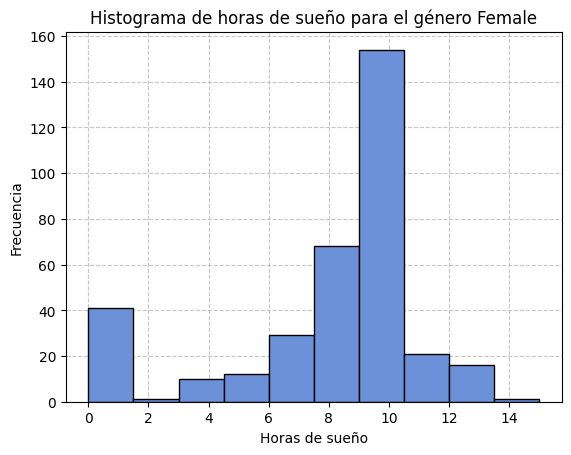

In [ ]:
# Selecciona el género para el que deseas crear el histograma
genero_female = "Female"

# Selecciona los datos de horas de sueño correspondientes a ese género
datos_horas_sueno = df_filtered[df_filtered["Gender"] == genero_female]["Sleep_Hours_Non_Schoolnight"]

# Crea el histograma
plt.hist(datos_horas_sueno, bins=10, edgecolor='black', color='#6C91D9')
plt.xlabel("Horas de sueño")
plt.ylabel("Frecuencia")
plt.title(f"Histograma de horas de sueño para el género {genero_female}")
ax = plt.gca()
ax.set_axisbelow(True)
ax.grid(True, linestyle='--', alpha=0.7)
plt.show()

### ***`10. Construya una tabla cruzada entre la variable “Materia preferida en el Colegio” versus la variable “Genero”.`***

Favorite_School_Subject  Art  Computers and technology  English  Geography  \
Gender                                                                       
Female                    56                         3       39          5   
Male                      11                        24       15          4   

Favorite_School_Subject  History  Languages  Mathematics and statistics  \
Gender                                                                    
Female                        30          7                          52   
Male                          54          4                          72   

Favorite_School_Subject  Music  Other  Physical education  Science  \
Gender                                                               
Female                      27     27                  12       47   
Male                        10     30                  59       41   

Favorite_School_Subject  Social studies  
Gender                                   
Female               

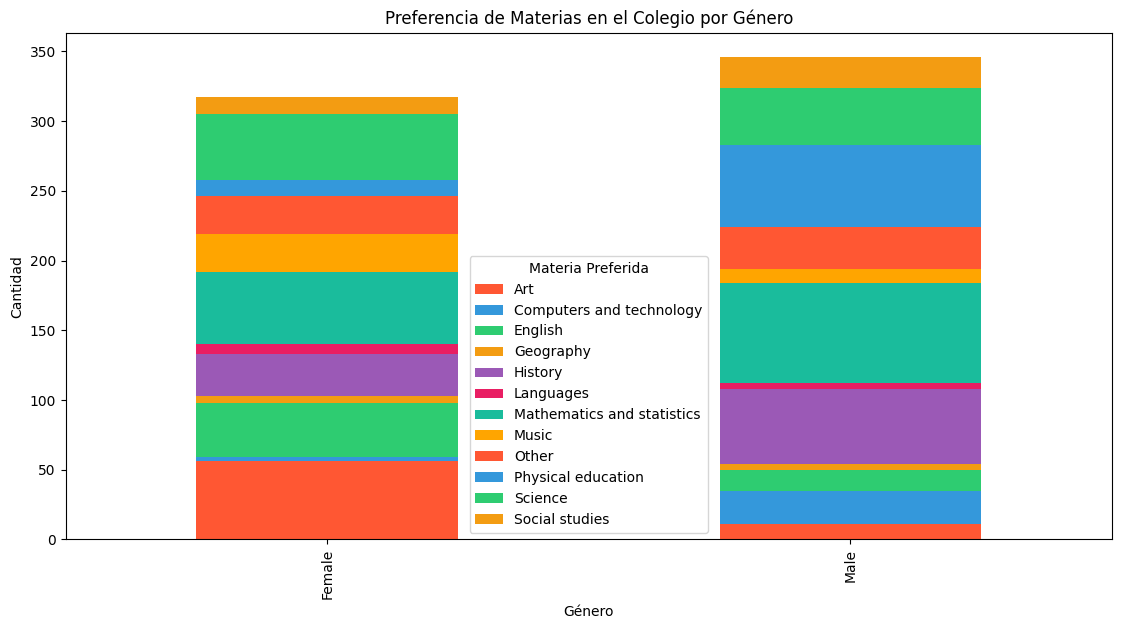

In [ ]:
# Eliminar filas con 'none' en la columna 'Genero'
df = df[df['Gender'] != 'None']
df = df[df['Favorite_School_Subject'] != 'None']

# Crear la tabla cruzada
cross_table = pd.crosstab(df["Gender"], df["Favorite_School_Subject"])

# Imprimir la tabla cruzada
print(cross_table)

# Crear un gráfico de barras apiladas
ax = cross_table.plot(kind="bar", stacked=True, figsize=(13.5, 6.58))
plt.title("Preferencia de Materias en el Colegio por Género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.legend(title="Materia Preferida")

# Mostrar el gráfico
plt.show()

In [ ]:
df1 = cross_table

# Calcular los porcentajes
total_students = df1.sum().sum()
percen_male = (df1.loc["Male"].sum() / total_students) * 100
percen_female = (df1.loc["Female"].sum() / total_students) * 100
percen_music = (df1["Music"].sum() / total_students) * 100
percen_female_other = (df1.loc["Female", "Other"] / df1.loc["Female"].sum()) * 100
percen_science_male = (df1.loc["Male", "Science"] / df1["Science"].sum()) * 100
percen_other_activities = (df1["Other"].sum() / total_students) * 100
percen_female_or_music = ((df1.loc["Female"].sum() + df1["Music"].sum() - df1.loc["Female", "Music"]) / total_students) * 100
percen_female_music_or_science = ((df1.loc["Female", "Music"] + df1.loc["Female", "Science"]) / total_students) * 100

print('El',int(percen_male),'% de estudiantes son hombres')
print('El',int(percen_music),'% de los estudiantes prefieren la música')
print('El',int(percen_female_other),'% de las mujeres estudiantes prefieren otras actividades')
print('El',int(percen_science_male),'% de los hombres prefieren Ciencias')
print('El',int(percen_female),'son mujeres y el',int(percen_other_activities),'% prefieren otras actividades')
print('El',int(percen_female_or_music),'% son mujeres y prefieren Música')
print('El',int(percen_female_music_or_science),'% de las mujeres les gusta las Ciencias o la Música')

El 52 % de estudiantes son hombres
El 5 % de los estudiantes prefieren la música
El 8 % de las mujeres estudiantes prefieren otras actividades
El 46 % de los hombres prefieren Ciencias
El 47 son mujeres y el 8 % prefieren otras actividades
El 49 % son mujeres y prefieren Música
El 11 % de las mujeres les gusta las Ciencias o la Música
